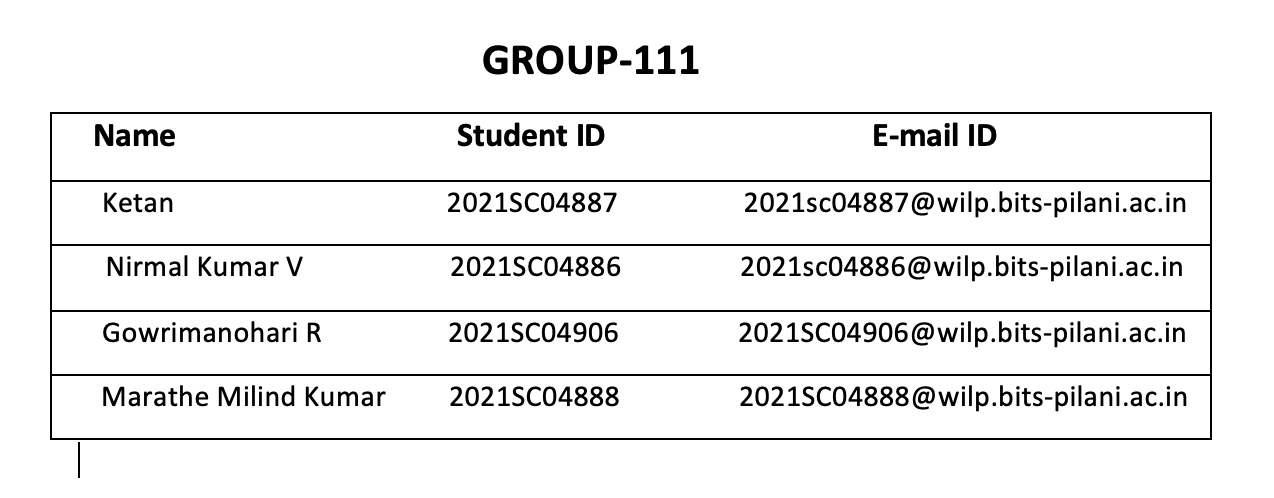

### Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

dataset=pd.read_csv('Steel_industry_data.csv')
## print the top5 records
## dataset.head()
dataset.tail()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
35035,31/12/18 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/18 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/18 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/18 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31/12/18 0:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


### Rename Columns

In [ ]:
## date	Usage_kWh	Lagging_Current_Reactive.Power_kVarh	Leading_Current_Reactive_Power_kVarh	CO2(tCO2)	Lagging_Current_Power_Factor	Leading_Current_Power_Factor	NSM	WeekStatus	Day_of_week	Load_Type
steelIndustryData = pd.DataFrame(dataset)
steelIndustryData.columns = ["Date", "Usage", "LagRP", "LeadRP", "CO2", "LagPF", "LeadPF", "NSM", "WeekStatus", "Day_of_week", "Load_Type"]
print('Column:', steelIndustryData.columns)
print('Column Data-types:')
steelIndustryData.info()


Column: Index(['Date', 'Usage', 'LagRP', 'LeadRP', 'CO2', 'LagPF', 'LeadPF', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')
Column Data-types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         35040 non-null  object 
 1   Usage        35040 non-null  float64
 2   LagRP        35040 non-null  float64
 3   LeadRP       35040 non-null  float64
 4   CO2          35040 non-null  float64
 5   LagPF        35040 non-null  float64
 6   LeadPF       35040 non-null  float64
 7   NSM          35040 non-null  int64  
 8   WeekStatus   35040 non-null  object 
 9   Day_of_week  35040 non-null  object 
 10  Load_Type    35040 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.9+ MB


## Exploratory Data Analysis

### **Missing Values**

In [ ]:
## 1 -step make the list of features which has missing values
features_empty=[features for features in steelIndustryData.columns if steelIndustryData[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_empty:
    print(feature, np.round(steelIndustryData[feature].isnull().mean(), 4),  ' % missing values')

## We don't have any empty values in our dataset thats why above code didn't print anything!!

### **EDA for Numerical Variables**

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in steelIndustryData.columns if steelIndustryData[feature].dtypes != 'O']
print('Number of numerical variables: ', numerical_features)

# Print out the correlation of the features
steelIndustryData.corr()

Number of numerical variables:  ['Usage', 'LagRP', 'LeadRP', 'CO2', 'LagPF', 'LeadPF', 'NSM']


,Usage,LagRP,LeadRP,CO2,LagPF,LeadPF,NSM
Usage,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
LagRP,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
LeadRP,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2,0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
LagPF,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
LeadPF,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


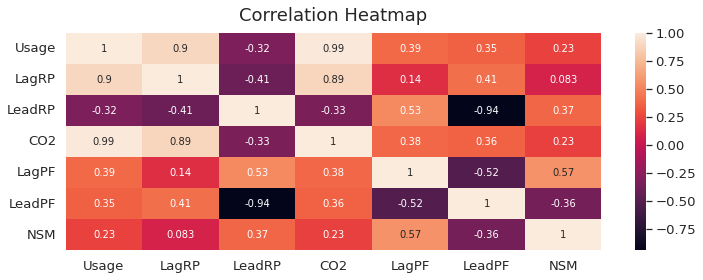

In [ ]:
#Plot the heatmap of the correlation.
plt.figure(figsize=(12, 4))
heatmap = sns.heatmap(steelIndustryData.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

# We can see the correlation of the numeric values features. 
# For example, Usage has high correlation with Lagging Reactive Power and CO2. Lagging Reative Power has high correlation with Usage and CO2.

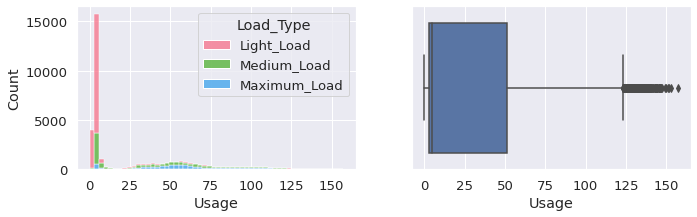

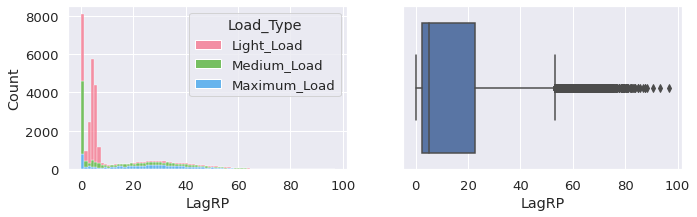

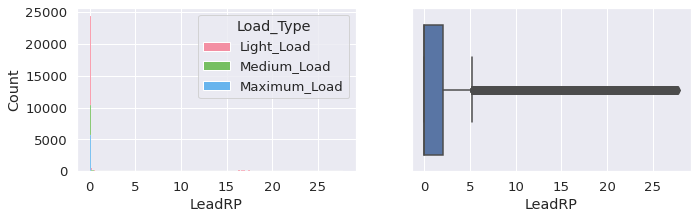

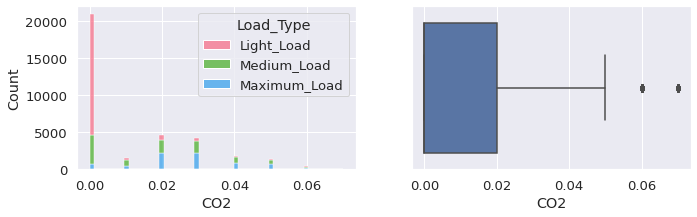

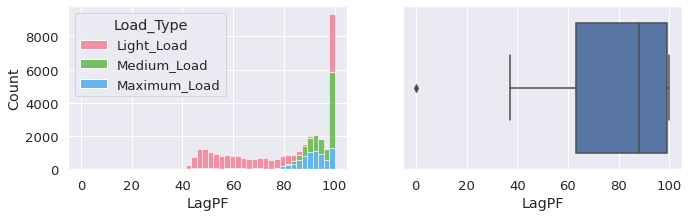

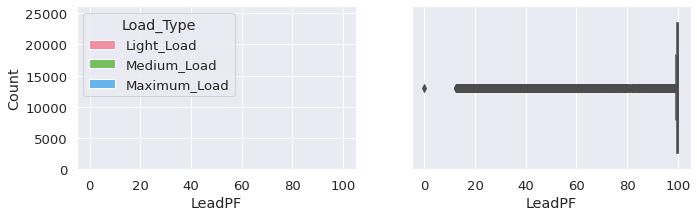

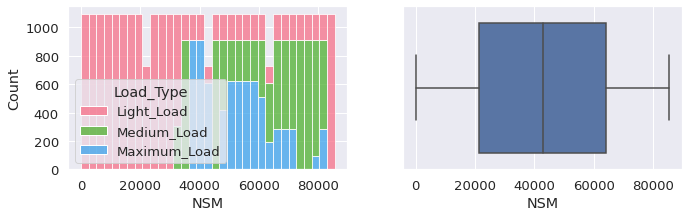

In [ ]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for col in numerical_features:
    df=steelIndustryData.copy()
    fig, ax = plt.subplots(1, 2, figsize=(11,3))
    sns.histplot(data=df, x=col, ax=ax[0],hue='Load_Type', palette='husl', multiple="stack")
    sns.boxplot(data=df, x=col, ax=ax[1])

There are few insights we can draw.

Most energy consumption usages are below 4.5kWh, and more than 15000 records are between 2.5 and 4.5kWh.
Lagging Reactive Power are mainly below 10kVarh. The majority of Lagging Reactive Power are at 0kVarh. 
More than 15000 Light Load and half of Medium Load at 0.00 CO2. 
The Lagging Power Factor mainly distributes between 40 to 100. the Leading Power Factor only gathers at 100. 
35000 NSM or below is Light Load. Between 35000 to 60000 NSM are contributed by Maximum Load, and from 60000 to 80000 are mainly from Medium Load.

### **EDA for Categorical Variables**

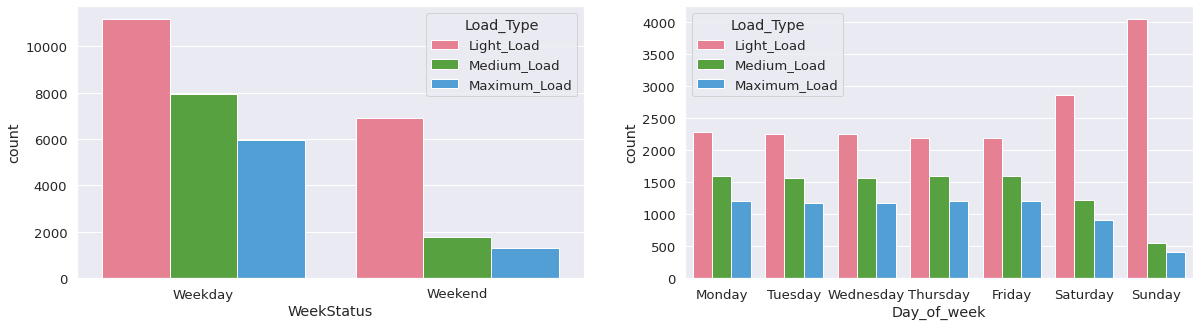

In [ ]:
#Plot the categorical columns WeekStatus and Day_of_week and divided by Target - Load type 

fig, ax = plt.subplots(1,2, figsize=(20,5))

sns.countplot(data=df, x="WeekStatus", hue="Load_Type",palette='husl', ax=ax[0])
sns.countplot(data=df, x="Day_of_week", hue="Load_Type",palette='husl', ax=ax[1])
fig.show()

# 'Light load type' has higher proportion on Weekends especially on Sunday.

## **Regression**

In [ ]:
# Performing necessary pre-processing / feature engineering on steelIndustryData set

categorical_features=[feature for feature in steelIndustryData.columns if steelIndustryData[feature].dtypes == 'O']
print('Categorical variables: ', categorical_features)
print('')

#indexing date
df=steelIndustryData.copy()
df=df.set_index('Date')

#handling categorical variable
df=pd.get_dummies(df, drop_first = True)
df.head()


Categorical variables:  ['Date', 'WeekStatus', 'Day_of_week', 'Load_Type']



,Usage,LagRP,LeadRP,CO2,LagPF,LeadPF,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
Date,,,,,,,,,,,,,,,,
01/01/18 0:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
01/01/18 0:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
01/01/18 0:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
01/01/18 1:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
01/01/18 1:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [ ]:
# Machine Learning activities: 

# Attributes of interest: All above categorical variables at x-axis
# and 'Usage'at y-axis.

X = df.drop('Usage', axis = 1)
Y = df['Usage']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print("Shapes: ")
print("X_Train: ",X_train.shape)
print("Y_Train: ",Y_train.shape)
print("X_Test: ",X_test.shape)
print("Y_Test: ",Y_test.shape)

# Model selected: Linear Regression Model.
print("")
print("LR Model: ")
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
%time lr.fit(X_train, Y_train)
print("LR Score: ", lr.score(X_test, Y_test))
 

Shapes: 
X_Train:  (24528, 15)
Y_Train:  (24528,)
X_Test:  (10512, 15)
Y_Test:  (10512,)

LR Model: 
CPU times: user 18.5 ms, sys: 6.17 ms, total: 24.7 ms
Wall time: 20.3 ms
LR Score:  0.9841681626773733


---

**Selected Model: The linear regression and reasons are**:

1.   Simplicity: Linear regression is a simple and easy-to-understand model that requires minimal mathematical knowledge. The linear relationship between the dependent and independent variables is represented by a straight line, which makes it easy to interpret and explain the results.
2.   Interpretability: Linear regression provides interpretable coefficients that represent the change in the dependent variable for a unit change in the independent variable. This makes it easy to understand the impact of each predictor on the outcome.
3.   Efficiency: Linear regression can be estimated efficiently using a variety of methods, including least squares (LS), which is computationally fast and widely available in statistical software.
4.   Versatility: Linear regression can be used for both continuous and categorical dependent variables, and it can also be extended to model nonlinear relationships between the dependent and independent.

Overall, the simplicity, interpretability, and efficiency of linear regression make it a popular and effective tool for modeling a wide range of relationships in data analysis and machine learning.


In [ ]:
# Evaluation metric:

# Mean absolute error and Mean squared error for the regressions
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
import math

Y_pred = lr.predict(X_test)
print("LR :")
print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Sqaured Error : ',math.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score : ', metrics.r2_score(Y_test, Y_pred))

LR :
Mean Absolute Error :  2.5519176087424835
Mean Squared Error :  17.769389051354427
Root Mean Sqaured Error :  4.215375315598177
R2 Score :  0.9841681626773733



---

The quality of a linear regression model can be evaluated using below metrics:

1.   R-squared (R2): It measures the proportion of the variance in the dependent variable that is explained by the independent variable(s) included in the model. R2 values range from 0 to 1, where 0 indicates that the model does not explain any variance in the dependent variable, and 1 indicates that the model explains all the variance.
2.   Root Mean Squared Error (RMSE): It measures the average distance between the predicted values and the actual values. It provides a measure of the model's predictive accuracy. A smaller RMSE indicates better predictive performance.
3.   Mean Absolute Error (MAE): It measures the absolute differences between the predicted values and the actual values. It is similar to RMSE, but it is less sensitive to outliers.










## Classification

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split


df = steelIndustryData.copy()

# Machine Learning activities: 

# Attributes of interest: All above categorical variables at x-axis and 'Load_Type'at y-axis.

categorical_vars = df.select_dtypes(include = "object").columns
# Pre-processing Activties: 
# Fit label encoder and return encoded labels using to scaled training data.

le = preprocessing.LabelEncoder()
df[categorical_vars] = df[categorical_vars].apply(le.fit_transform)

df1 = df.drop('Date', axis='columns') 

Xdt = df1.drop(['Load_Type'], axis=1)
Ydt = df1['Load_Type']

# Droping the "Load_Type" and converting all the columns whoes having datatype = number, in to list.
df1.drop(columns=["Load_Type"]).select_dtypes('number').columns.tolist()

# Split train and test
Xdt_train, Xdt_test, Ydt_train, Ydt_test = train_test_split(Xdt, Ydt, test_size = 0.3, random_state = 42)

numerical_features = ['Usage', 'LagRP', 'LeadRP', 'CO2', 'LagPF', 'LeadPF', 'NSM']
passthrough_features = ['WeekStatus', 'Day_of_week']

#Prepare preprocessor:
preprocessor = make_column_transformer(
    (make_pipeline(StandardScaler()),numerical_features,), 
    ("passthrough", passthrough_features),)

# Model selected: DecisionTreeClassifier.
# make pipeline
# We have tuned hyperparameters such as the maximum depth of the tree so the limitation of overfitting to the training data can be mitigated.
pipe = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=5))
pipe.fit(Xdt_train, Ydt_train)

score = pipe.score(Xdt_test, Ydt_test)
# Model Accuracy, how often is the classifier correct?
print("score:",score)


score: 0.8554033485540334



---

**Selected Model: DecisionTreeClassifier and reasons are:**

1.  Interpretable: Decision trees are easy to interpret and understand. They can provide insights into the decision-making process of the model, making it easier to explain.
2.   Nonlinear Relationships: Decision trees can capture nonlinear relationships between features and the target variable. They can handle complex datasets with a mixture of continuous and categorical features.
3. Scalability: Decision trees can handle large datasets with high dimensionality. They are computationally efficient and can handle datasets with many features.
4. Handling Missing Data: Decision trees can handle missing data. They can classify observations even when some features are missing by considering the available features.
5. Ensemble Methods: Decision trees can be combined with other models, such as random forests or gradient boosting, to improve the accuracy of the model.

However, Decision trees have some limitations such as overfitting to the training data and being sensitive to small variations in the data. But, by tuning hyperparameters such as the maximum depth of the tree, the minimum number of samples required to split a node, or the minimum number of samples required to be at a leaf node, these limitations can be mitigated.

classification_report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      5372
           1       0.77      0.78      0.78      2229
           2       0.79      0.68      0.73      2911

    accuracy                           0.86     10512
   macro avg       0.83      0.81      0.82     10512
weighted avg       0.85      0.86      0.85     10512


Confusion Matrix:


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

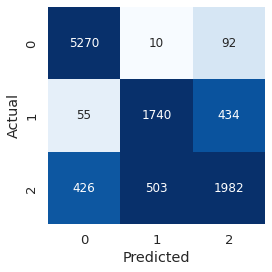

In [ ]:
# Evaluation metric: precision recall f1-score support

Ydt_pred = pipe.predict(Xdt_test)
print("classification_report:")
print("",classification_report(Ydt_test, Ydt_pred))


data = confusion_matrix(Ydt_test, Ydt_pred)
df_cm = pd.DataFrame(data, columns=np.unique(Ydt_test), index = np.unique(Ydt_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)

print("")
print("Confusion Matrix:")

sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False, vmax=500, square=True, fmt="d", cmap='Blues')

Confusion Matrix: It is a table that shows the number of true positives, true negatives, false positives, and false negatives. It is useful for visualizing the performance of a model.

---
DecisionTreeClassifier model can be evaluated using below of metrics:

1.   Accuracy: This is the most common metric used for classification problems. It measures the proportion of correctly classified instances out of the total number of instances.
2. Precision: It measures the proportion of true positives (TP) out of all positive predictions (TP + FP). Precision is useful when the cost of false positives is high.
3. Recall: It measures the proportion of true positives (TP) out of all actual positives (TP + FN). Recall is useful when the cost of false negatives is high.
4. F1 Score: It is the harmonic mean of precision and recall. It gives equal weightage to both precision and recall and is useful when you need to balance both metrics.

## Ensemble ML

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model selected: RandomForestClassifier.
# make pipeline
# we have tunes hyperparameters
rfPipe = make_pipeline(preprocessor, RandomForestClassifier(max_leaf_nodes=16, n_estimators=200))
rfPipe.fit(Xdt_train, Ydt_train)

rfscore = rfPipe.score(Xdt_test, Ydt_test)
# Model Accuracy, how often is the classifier correct?
print("rf-score:",rfscore)


rf-score: 0.8556887366818874


---

**Selected Model: RandomForestClassifier and reasons are:**

Random Forest is an ensemble model that combines multiple decision trees to create a more robust and accurate model. It is a popular classification and regression algorithm in machine learning, and reasons are:

1.  High Accuracy: Random Forests have been proven to produce high accuracy compared to single decision trees. By aggregating predictions from multiple decision trees, the model can reduce the risk of overfitting and improve the generalization ability of the model.
2. Robust to Noisy Data: Random Forests are robust to noisy data and outliers because they aggregate predictions from multiple decision trees. This means that if one tree is affected by noisy data or outliers, the impact on the overall model is reduced.
3. Handling High Dimensionality: Random Forests can handle datasets with a large number of features, making them suitable for high-dimensional datasets.
4. Variable Importance: Random Forests can provide information on feature importance, which can be useful in identifying the most important features in a dataset.
5. Easy to Implement: Random Forests are relatively easy to implement, and there are several libraries available in various programming languages, making it easy to get started with the algorithm.
6. Versatility: Random Forests can be used for both classification and regression tasks, making it a versatile algorithm that can be applied to a wide range of problems.

Random Forests also have some limitations, such as being computationally expensive and less interpretable than a single decision tree. Nonetheless, with proper tuning of hyperparameters and careful consideration of feature importance, Random Forests can be a powerful and effective machine learning model.



Random Forests classification_report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      5372
           1       0.76      0.77      0.76      2229
           2       0.78      0.69      0.74      2911

    accuracy                           0.86     10512
   macro avg       0.82      0.81      0.82     10512
weighted avg       0.85      0.86      0.85     10512


Confusion Matrix:


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

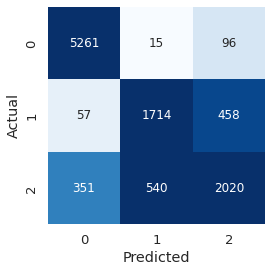

In [ ]:
# Evaluation metric: precision recall f1-score

Yrf_pred = rfPipe.predict(Xdt_test)
print("Random Forests classification_report:")
print("",classification_report(Ydt_test, Yrf_pred))


rfdata = confusion_matrix(Ydt_test, Yrf_pred)
rfdf_cm = pd.DataFrame(rfdata, columns=np.unique(Ydt_test), index = np.unique(Ydt_test))
rfdf_cm.index.name = 'Actual'
rfdf_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)

print("")
print("Confusion Matrix:")

sns.heatmap(rfdf_cm, annot=True,annot_kws={"size": 12}, cbar=False, vmax=500, square=True, fmt="d", cmap='Blues')

RandomForestClassifier model can be evaluated using same metrics which we were used in DecisionTreeClassifier i.e. Accuracy, Recall, F1-Score, Percision.
